In [2]:
!pip install statsmodels

In [3]:
import pandas as pd

In [30]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\merged_dataset.csv')

In [32]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [34]:
df = df.sort_values('Transaction_Date')
df.set_index('Transaction_Date', inplace=True)
df_target = df['Total_Spending']  

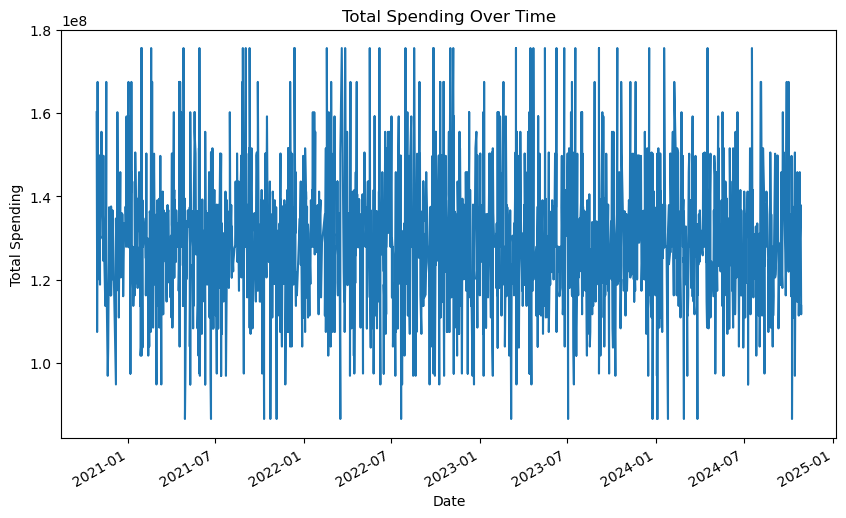

In [38]:
import matplotlib.pyplot as plt

df_target.plot(figsize=(10,6))
plt.title("Total Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Total Spending")
plt.show()

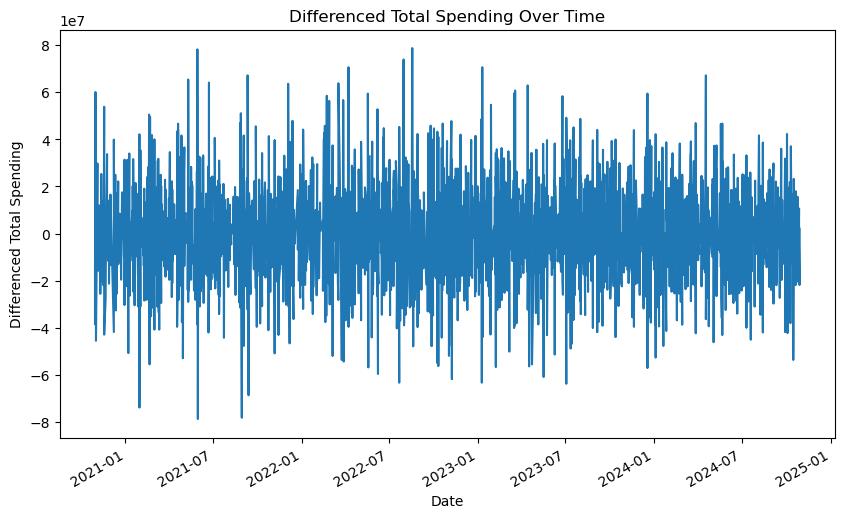

In [40]:
df_target_diff = df_target.diff().dropna()

df_target_diff.plot(figsize=(10,6))
plt.title("Differenced Total Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Differenced Total Spending")
plt.show()

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df_target, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust these orders as needed
sarima_result = sarima_model.fit()

print(sarima_result.summary())

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Total_Spending   No. Observations:                 2102
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -37946.572
Date:                            Thu, 13 Mar 2025   AIC                          75903.143
Time:                                    20:55:38   BIC                          75931.365
Sample:                                         0   HQIC                         75913.483
                                           - 2102                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0505      0.054      0.941      0.347      -0.055       0.156
ma.L1         -0.8488      0.028   

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_22968\3820225800.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df_target.index[-1], periods=forecast_steps + 1, freq='M')[1:]


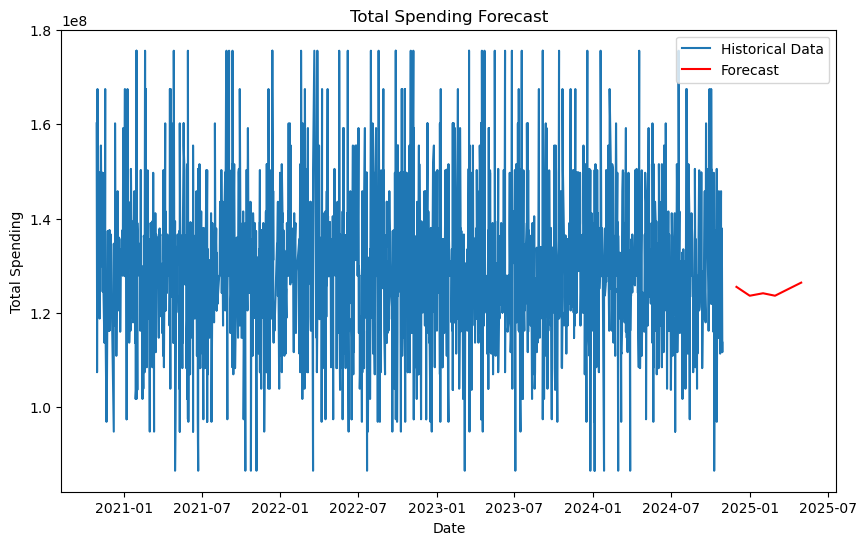

In [44]:
forecast_steps = 6
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_target.index[-1], periods=forecast_steps + 1, freq='M')[1:]

plt.figure(figsize=(10, 6))
plt.plot(df_target, label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast')
plt.title("Total Spending Forecast")
plt.xlabel("Date")
plt.ylabel("Total Spending")
plt.legend()
plt.show()

In [64]:
import statsmodels.api as sm

sarima_model = sm.tsa.statespace.SARIMAX(df['Total_Spending'], 
                                         order=(1, 1, 1), 
                                         seasonal_order=(1, 1, 1, 12), 
                                         enforce_stationarity=False, 
                                         enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_22968\940252697.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:]


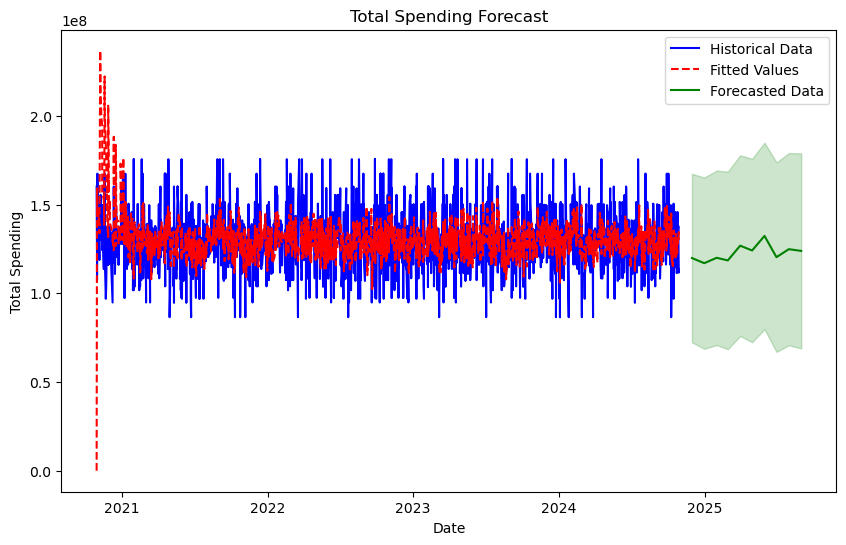

In [66]:
forecast_steps = 10
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:]


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.plot(df.index, df['Total_Spending'], label='Historical Data', color='blue')


plt.plot(df.index, sarima_result.fittedvalues, label='Fitted Values', linestyle='--', color='red')


plt.plot(forecast_index, forecast_mean, label='Forecasted Data', color='green')


plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)

plt.title('Total Spending Forecast')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend()

plt.show()